# A theoretical look at stochastic gradient descent

Peter Ralph

https://uodsci.github.io/dsci345

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

# Application: stochastic gradient descent

## Problem: find the mean

Suppose we have a very large dataset,
so large (or unwieldy) that we don't get to see all of it at once.
Instead, we get fed it in randomly chosen *batches*, each of size $n$.
We would like to do something simple: estimate the "typical value".

*Question:* How would you do this?

*Fact:* For any collection of numbers $x_1, \ldots, x_N$,
the *mean* is the unique value that minimizes the mean-squared error,
i.e., if $\mu = (1/N) \sum_{i=1}^N x_i$ and
$$  F_x(m) = \frac{1}{N} \sum_{i=1}^N (x_i - m)^2 ,$$
then $\min_m F_x(m) = F_x(\mu)$.

*Proof:* The derivative of $F(m)$ is
$$ F_x'(m) = 2 \frac{1}{N} \sum_{i=1}^N (m - x_i) = 2(m - \mu) .$$
This is equal to zero only at $m = \mu$.

## Minimization

Here's a solution: first, start with a guess $m = 0$, and pick an $\epsilon > 0$.
Then, for each batch $X_1, \ldots, X_n$:

1. Compute the batch mean $\bar X = (1/n) \sum_{i=1}^n X_i$.

2. Compute the gradient of $F$ using this batch,
    $F_X'(m) = 2 (m - \bar X)$.
    
3. If $F_X'(m)$ is small, then stop. Otherwise, move our guess $m$ a little bit,
    updating $m \mapsto m - \epsilon F_X'(m)$.

## How's it work in practice?

In [1]:
# set-up
mu = 3
n = 10

def next_batch():
    return rng.exponential(scale=mu, size=n)

In [13]:
m = 0
eps = 0.01  #  play around with this!
num_batches = 500
mvec = np.repeat(np.nan, num_batches)
mvec[0] = m
for k in range(1, num_batches):
    X = next_batch()
    dF = 2 * (m - np.mean(X))
    m -= eps * dF
    mvec[k] = m
    if k % 25 == 0:
        print(f"step {k}: value: {m:.2f}")

step 25: value: 1.28
step 50: value: 2.03
step 75: value: 2.53
step 100: value: 2.69
step 125: value: 2.82
step 150: value: 2.90
step 175: value: 3.00
step 200: value: 2.98
step 225: value: 2.89
step 250: value: 2.88
step 275: value: 2.97
step 300: value: 3.06
step 325: value: 3.11
step 350: value: 3.10
step 375: value: 3.04
step 400: value: 3.07
step 425: value: 3.05
step 450: value: 3.17
step 475: value: 3.13


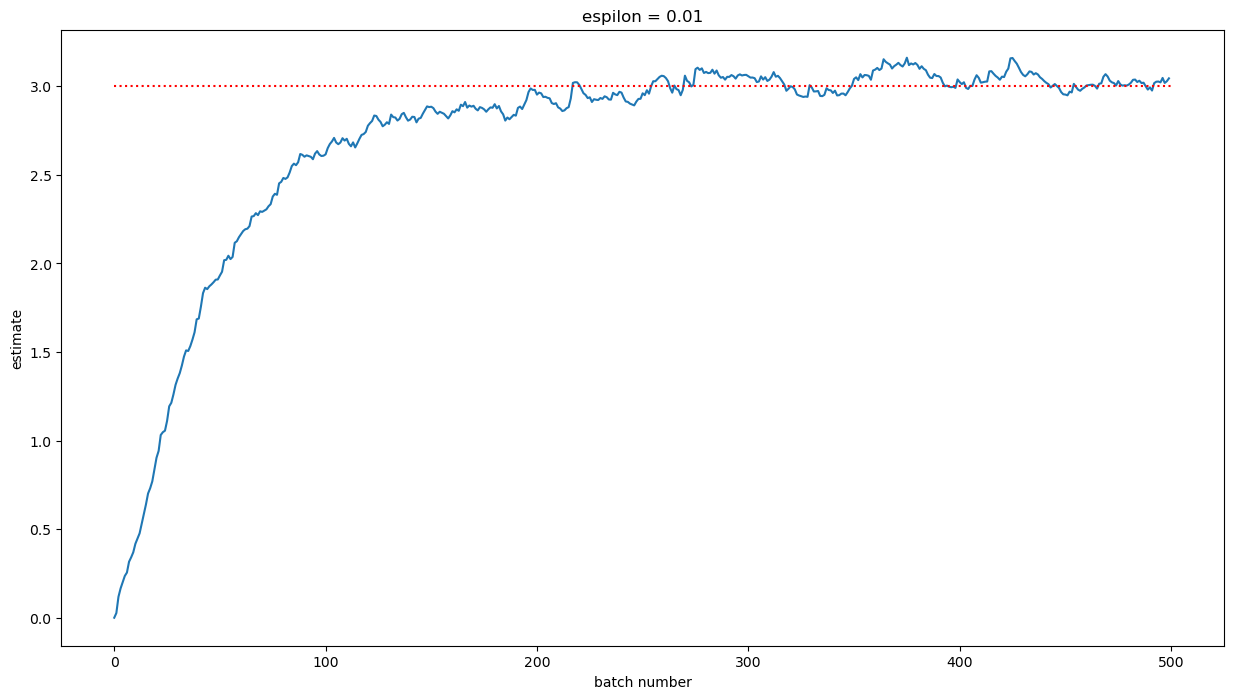

In [7]:
plt.plot(mvec)
plt.xlabel("batch number"); plt.ylabel("estimate")
plt.title(f"espilon = {eps}")
plt.hlines(mu, 0, num_batches, "red", ":"); 

## That's nice, but what about theory?

Well, we know that if $X_1, \ldots, X_n$ are independent and identically distributed (*iid*)
with mean $\E[X_i] = \mu$ and standard deviation $\text{sd}(X_i) = \sigma$,
then
$$ \E[\bar X] = \mu $$
and
$$ \text{sd}[ \bar X ] = \frac{\sigma}{\sqrt{n}} . $$

So, the *expected change* is
$$ \E[F'_X(m)] = \E[2 (m - \bar X)] = 2 (m - \mu) , $$
and the standard deviation is
$$ \text{sd}[F'_X(m)] = \frac{2 \sigma}{\sqrt{n}} . $$

## Conclusion

- If $m = \mu$ then there is no mean change, i.e., "equilibrium" is at $m = \mu$.
- If $|m - \mu| \gg 2\sigma/\sqrt{n}$, then the *mean change* is more important than noise.
- If $|m - \mu| \le 2\sigma/\sqrt{n}$ then the "noise" is important.

So, this will fluctuate around $\mu$, varying by an amount proportional to $\sigma/\sqrt{n}$. (For the exponential, $\sigma=\mu$.)

# A diversion

What happens if the mean changes with time?
Let's have it switch back and forth between 2 and 4
every 200 steps.

In [ ]:
# set-up
n = 10

def next_batch(t):
    if int(t/200) % 2 == 0:
        mu = 2
    else:
        mu = 4
    return rng.exponential(scale=mu, size=n)

In [ ]:
m = 0
eps = 0.05  #  play around with this!
num_batches = 1000
mvec = np.repeat(np.nan, num_batches)
mvec[0] = m
for k in range(1, num_batches):
    X = next_batch(k)
    dF = 2 * (m - np.mean(X))
    m -= eps * dF
    mvec[k] = m

In [ ]:
plt.plot(mvec)
plt.xlabel("batch number"); plt.ylabel("estimate")
plt.title(f"espilon = {eps}")
plt.hlines([2, 4], 0, num_batches, "red", ":"); 